In [151]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
from scipy import stats

In [237]:
df = pd.read_csv('data/2019-nCov stats - International.csv', ).set_index('time').T.dropna(how='all').drop('Alert Level')\
    .drop(['Hongkong','Macao','Taiwan',])
#            'French Polynesia','Guam','New Caledonia','Northen Mariana Islands',
#            'Faroe Islands','Gibraltar','Guernsey','Jersey','Greenland','Isle of Man','Kosovo',
#            'Palestine',
#            'French Guiana','Martinique','Saint Martin','Saint Barthelemy','Cayman Islands','Guadeloupe',
#            'Curacao','Puerto Rico','Aruba','US Virgin Islands','Bermuda','Montserrat','Saint Maarten',
#            'Turks and Caicos Islands','Anguilla','British Virgin Islands','Dominica',
#            'Reunion','Mayotte',           
#            'Diamond Princess'],axis=1)\
    
#     .dropna(subset=['time']).set_index('time').dropna(how='all').drop(['Hongkong','Macao','Taiwan','Diamond Princess'],axis=1)

KeyError: "['Hongkong' 'Macao' 'Taiwan'] not found in axis"

In [ ]:
# countries that WOM agreen with WHO but one day ahead
for i, v in enumerate([63,68,75,100,124,158,221,319,435,541,704,994,1301,1630,2183,2770,
                       3613,4596,6344,9197,13779,19367,24192,33592,43781,54856,68211,85435,104126,123578,143491,163788,188530,
                      215003,240395]):
    i_ = df.index[39+i]
    df.at[i_, 'US'] = v
    
df.at['3-16','Iran']=13938


# countries that don't agree with WHO
# df.at['3-19', 'Spain']=14769

# Write difference for google sheet

In [155]:
focus = df.copy()
for i in list(focus):
    focus[i] = focus[i] - focus[i].shift(1)
focus.to_csv('data/Intl for color tab.csv')

# Global Heatmap

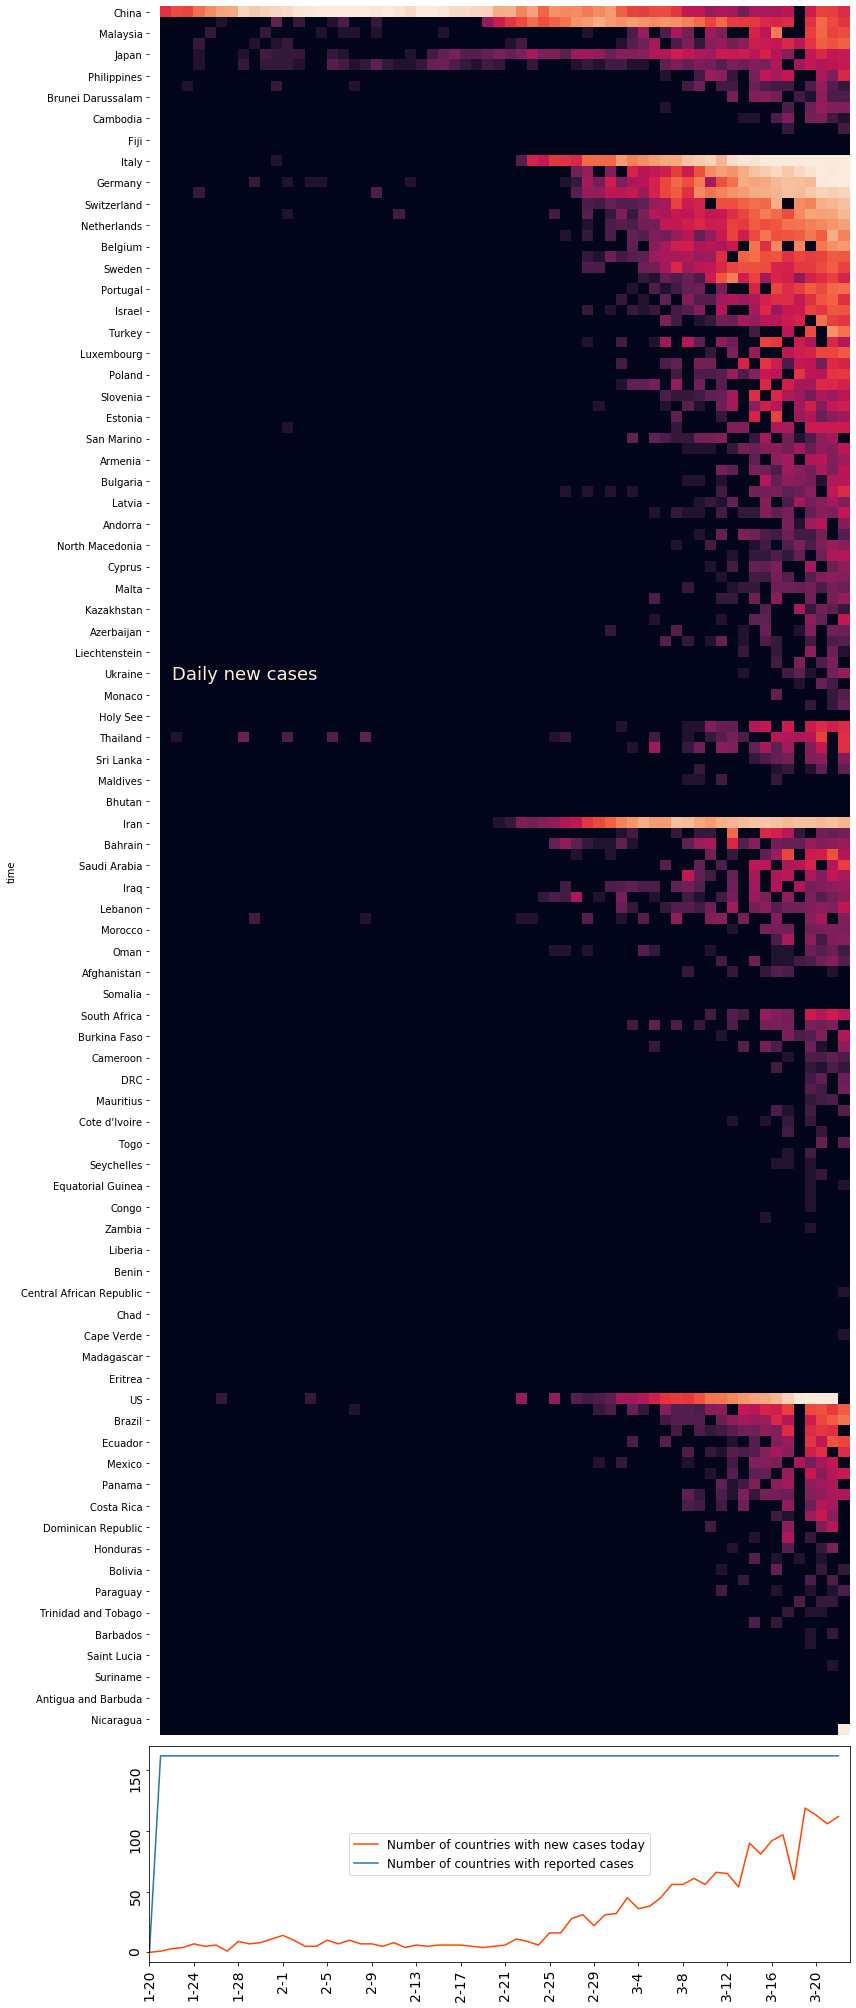

In [211]:
focus = df.copy().fillna(0)
for i in list(focus):
    focus[i] = focus[i] - focus[i].shift(1)

fig, ax = plt.subplots(2, 1, figsize=(12,28),sharex=True, gridspec_kw = {'height_ratios':[8, 1]})
plt.subplots_adjust(wspace=0, hspace=0)

sns.heatmap((np.log(focus.clip(lower=1)).T), vmax=8, ax=ax[0], cbar=False)
# ax[0].tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='major',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     )

ax[0].axes.get_xaxis().set_visible(False)
ax[0].annotate('Daily new cases', xy=(2,63),c='papayawhip',size=18)

ax[1].plot((focus.fillna(0)>0).sum(axis=1), label='Number of countries with new cases today', c='orangered')
ax[1].plot(focus.notnull().sum(axis=1), label='Number of countries with reported cases')
ax[1].tick_params(labelrotation=90, labelsize=14)
ax[1].xaxis.set_major_locator(plt.MaxNLocator(20))
ax[1].legend(fontsize=12)
plt.tight_layout()
# plt.savefig('figures/Global_heat_3_4.png',dpi=600)

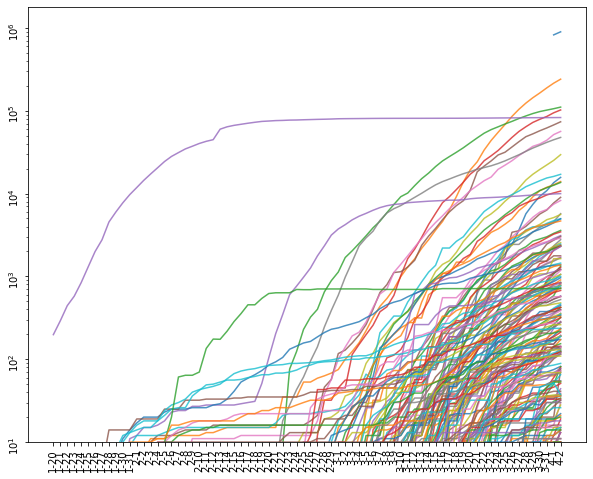

In [156]:
focus = df.sort_values(by=df.index[-1], axis=1, ascending=False).iloc[:,:].copy()

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(10,8))

for country in list(focus):
    ax.plot(focus.index, focus[country], label=country, alpha=0.8)

ax.set_yscale('log')
ax.set_ylim(bottom=10)
ax.tick_params(labelrotation=90)
# ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [7]:
china = pd.read_csv('data/2019-nCov stats - China CDC.csv').set_index('time').dropna(how='all')
china.tail(3)

,new confirmed,new confirmed including CD,current confirmed,cum confirmed including CD,cum confirmed include clinical,current clinically diagnosed,new suspected,current suspected,new serious,current serious,new death including CD,new death from CD,cum death including from clinical,new recovered,cum recovered,current on medical observation,today released,cum on medical observation,Unnamed: 19
time,,,,,,,,,,,,,,,,,,,
2/10/2020,2478.0,NaN,37626.0,NaN,42638.0,5677.0,3536.0,21675.0,849.0,7333.0,108.0,NaN,1016.0,176.0,3996.0,187728.0,26724.0,428438.0,42 10 18
2/11/2020,2015.0,NaN,38800.0,NaN,44653.0,10567.0,3342.0,16067.0,871.0,8204.0,97.0,NaN,1113.0,744.0,4740.0,185037.0,30068.0,451462.0,49 10 18
2/12/2020,1820.0,15152.0,39194.0,52526.0,59804.0,13332.0,2807.0,13435.0,-174.0,8030.0,254.0,135.0,1367.0,1171.0,5911.0,181386.0,29429.0,471531.0,50 10 18


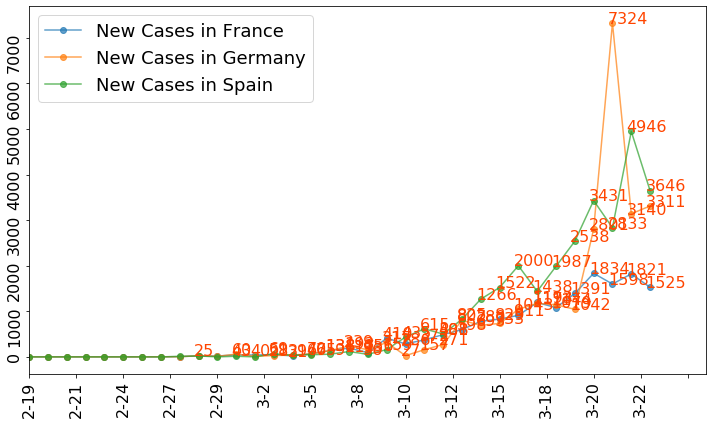

In [240]:
fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(10,6))


for country in ['France','Germany','Spain',]:
    focus =  df.loc[:,[country]].copy()
    focus['new'] = focus[country] - focus[country].shift(1)
        
    ax.plot(focus.index, focus.new, 'o-',label='New Cases in '+country, alpha=0.7)
#     ax.scatter([i[5:] for i in focus.index], focus.new, s=20, label='')
    # ax.plot(focus.index, focus['Republic\n of Korea'],c='orangered')

    for i, v in enumerate(focus.new):
        if v > 20 and v != 37:
            ax.text(i-0.25, v+1, str(int(v)), color='orangered', fontsize=16)

ax.tick_params(labelrotation=90, labelsize=16)
ax.set_xlim(left=30)
# ax.set_yscale('log')

ax.legend(loc="upper left", fontsize=18)
plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
# plt.savefig('figures/France_Germany_Spain_3_14.png',dpi=600)


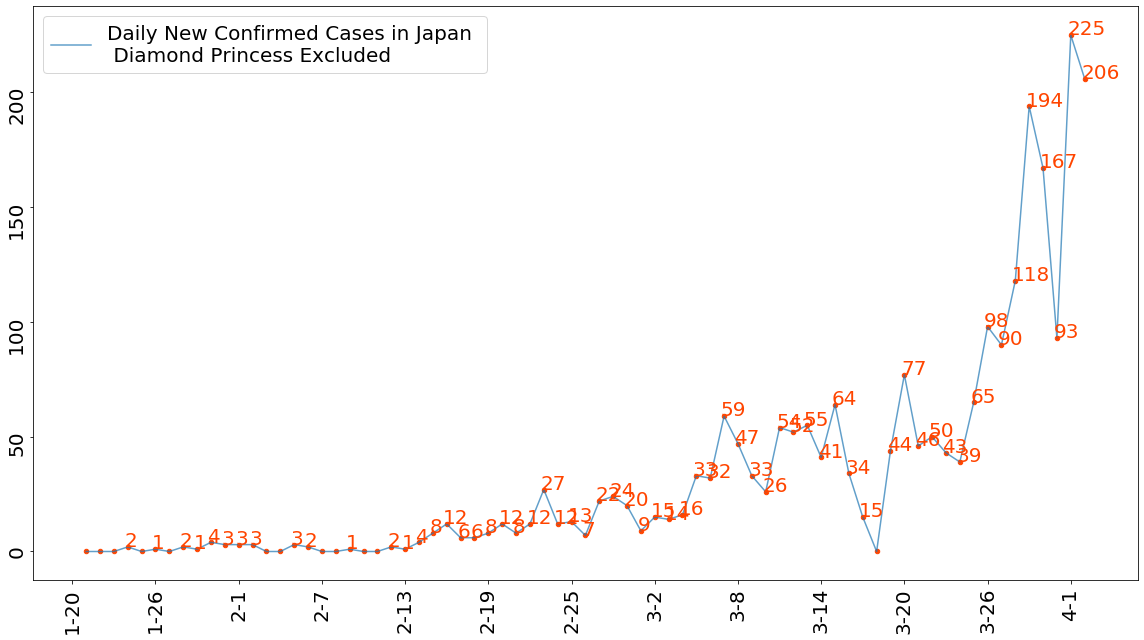

In [183]:
country = 'Japan'
focus =  df.loc[:,[country]].copy()
focus['new'] = focus[country] - focus[country].shift(1)
focus

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))
ax.plot(focus.index, focus.new, label='Daily New Confirmed Cases in Japan \n Diamond Princess Excluded', alpha=0.7)
ax.scatter(focus.index, focus.new, c='orangered',s=20, label='')
# ax.plot(focus.index, focus['Republic\n of Korea'],c='orangered')

for i, v in enumerate(focus.new):
    if v > 0:
        ax.text(i-0.25, v+0.23, str(int(v)), color='orangered', fontsize=20)

ax.tick_params(labelrotation=90, labelsize=20)
# ax.set_ylim((0, 62))

ax.legend(loc="upper left", fontsize=20)
plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
# plt.savefig('figures/Japan_3_17.png',dpi=600)


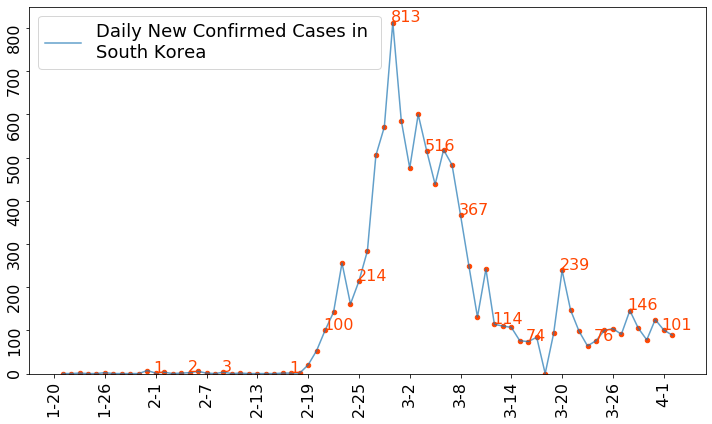

In [158]:
country = 'South Korea'
focus =  df.loc[:,[country]].copy()
focus['new'] = focus[country] - focus[country].shift(1)
focus

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(10,6))
ax.plot(focus.index, focus.new, label='Daily New Confirmed Cases in \nSouth Korea', alpha=0.7)
ax.scatter(focus.index, focus.new, c='orangered',s=20, label='')
# ax.plot(focus.index, focus['Republic\n of Korea'],c='orangered')

for i, v in enumerate(focus.new):
    if v > 0 and i & 3 == 0:
        ax.text(i-0.25, v+2, str(int(v)), color='orangered', fontsize=16)

ax.tick_params(labelrotation=90, labelsize=16)
ax.set_ylim((0, 850))
ax.legend(loc="upper left", fontsize=18)
plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
# plt.savefig('figures/Korea_3_17.png',dpi=600)

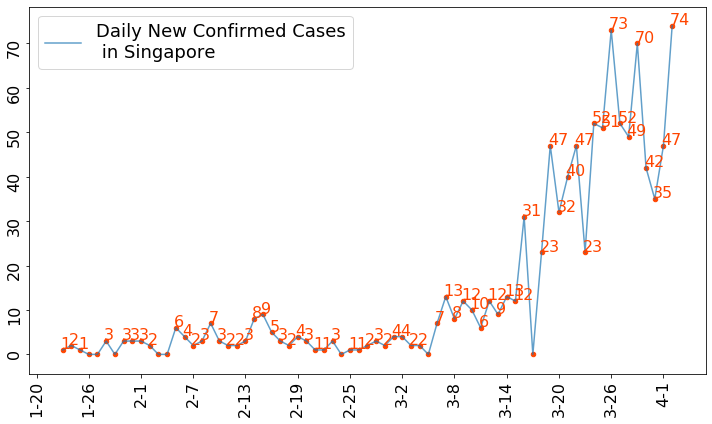

In [159]:
country = 'Singapore'
focus =  df.loc[:,[country]].copy()
focus['new'] = focus[country] - focus[country].shift(1)
focus

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(10,6))
ax.plot(focus.index, focus.new, label='Daily New Confirmed Cases\n in Singapore', alpha=0.7)
ax.scatter(focus.index, focus.new, c='orangered',s=20, label='')
# ax.plot(focus.index, focus['Republic\n of Korea'],c='orangered')

for i, v in enumerate(focus.new):
    if v > 0:
        ax.text(i-0.25, v+0.3, str(int(v)), color='orangered', fontsize=16)

ax.tick_params(labelrotation=90, labelsize=16)
# ax.set_ylim((0, 14))

ax.legend(loc="upper left", fontsize=18)

plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
# plt.savefig('figures/Singapore_3_17.png',dpi=600)


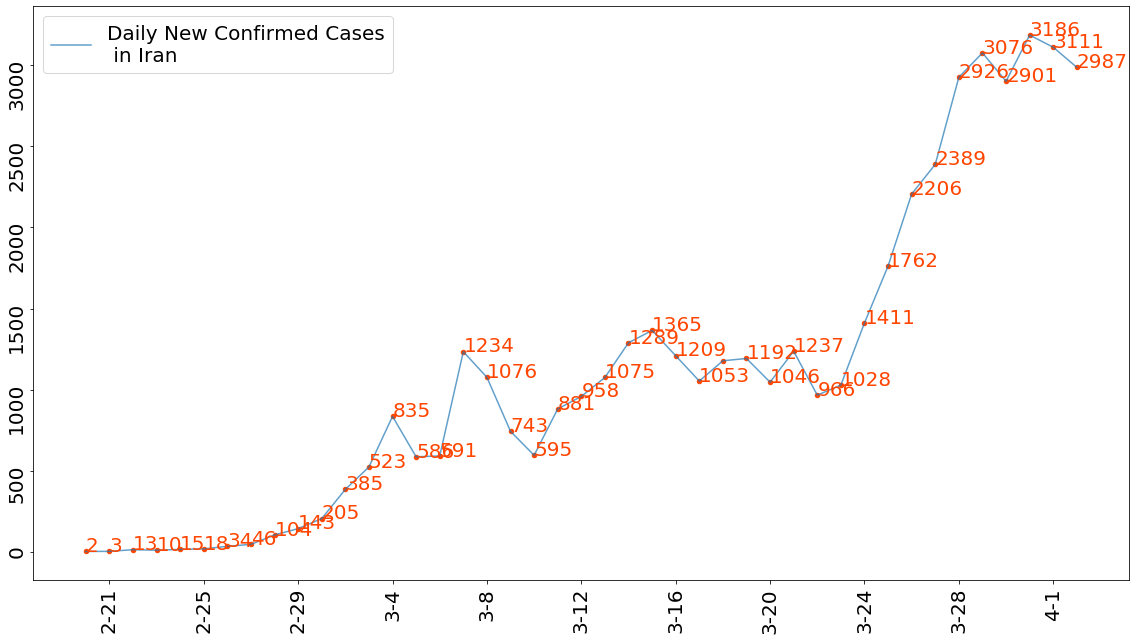

In [161]:
country = 'Iran'
focus =  df.loc[:,[country]].copy()
focus['new'] = focus[country] - focus[country].shift(1)
focus

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))
ax.plot(focus.index, focus.new, label='Daily New Confirmed Cases\n in Iran', alpha=0.7)
ax.scatter(focus.index, focus.new, c='orangered',s=20, label='')
# ax.plot(focus.index, focus['Republic\n of Korea'],c='orangered')

for i, v in enumerate(focus.new):
    if v > 0 and v != 1178:
        ax.text(i, v+0.3, str(int(v)), color='orangered', fontsize=20)

# ax.set_yscale('log')
ax.tick_params(labelrotation=90, labelsize=20)
# ax.set_ylim((0, 1285))

ax.legend(loc="upper left", fontsize=20)

plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.savefig('figures/Iran_4_2.png',dpi=600)

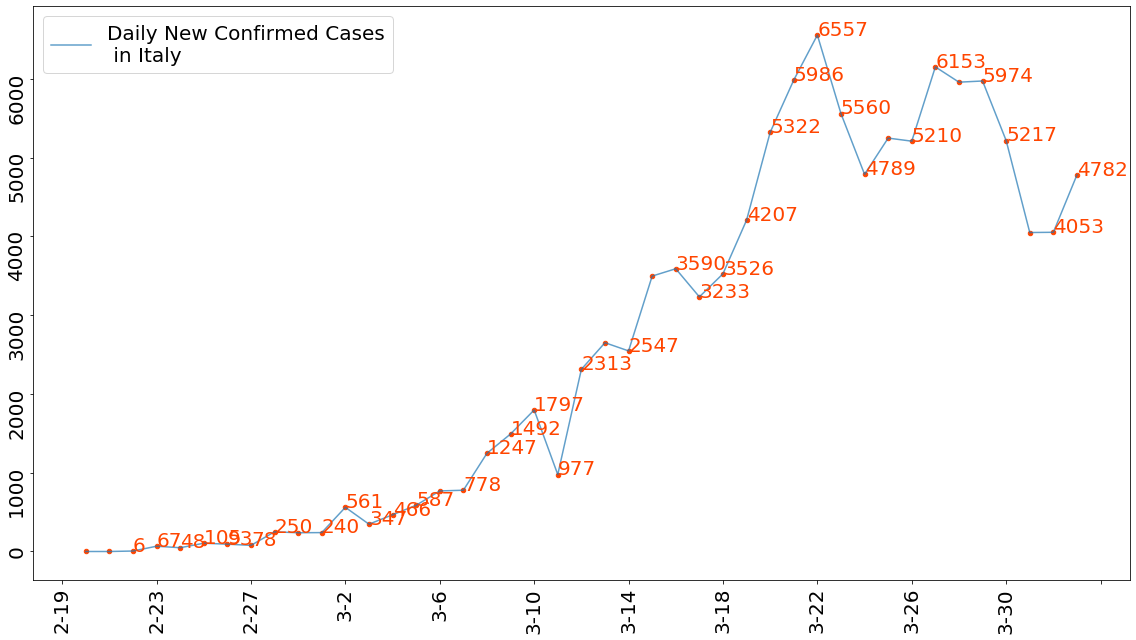

In [162]:
country = 'Italy'
focus =  df.loc[:,[country]].copy()[30:]
focus['new'] = focus[country] - focus[country].shift(1)
focus

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))
ax.plot(focus.index, focus.new, label='Daily New Confirmed Cases\n in Italy', alpha=0.7)
ax.scatter(focus.index, focus.new, c='orangered',s=20, label='')
# ax.plot(focus.index, focus['Republic\n of Korea'],c='orangered')

for i, v in enumerate(focus.new):
    if v > 0:
        if v != 238 and v not in [769,2651,3497,5249,5959,4050]:
            ax.text(i, v+0.3, str(int(v)), color='orangered', fontsize=20)

ax.tick_params(labelrotation=90, labelsize=20)
# ax.set_yscale('log')
ax.legend(loc="upper left", fontsize=20)

plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.savefig('figures/Italy_4_2.png',dpi=600)

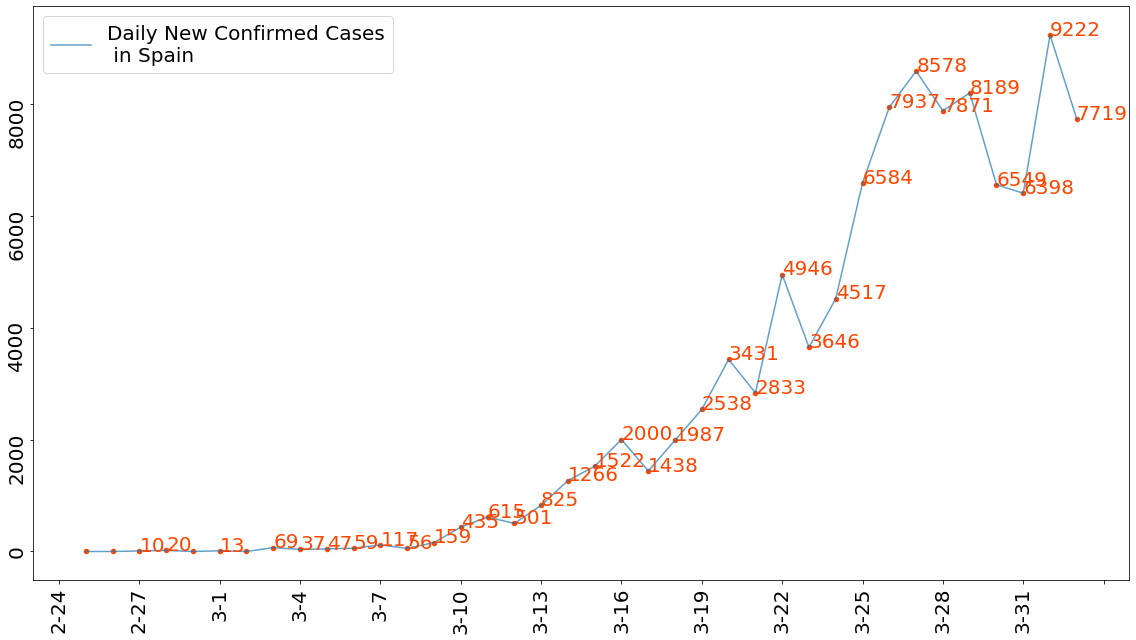

In [232]:
country = 'Spain'
focus =  df.loc[:,[country]].copy()[35:]
focus['new'] = focus[country] - focus[country].shift(1)
focus

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))
ax.plot(focus.index, focus.new, label='Daily New Confirmed Cases\n in Spain', alpha=0.7)
ax.scatter(focus.index, focus.new, c='orangered',s=20, label='')
# ax.plot(focus.index, focus['Republic\n of Korea'],c='orangered')

for i, v in enumerate(focus.new):
    if v > 0:
        ax.text(i, v+0.3, str(int(v)), color='orangered', fontsize=20)

# ax.set_yscale('log')
ax.tick_params(labelrotation=90, labelsize=20)
# ax.set_ylim((0, 1285))

ax.legend(loc="upper left", fontsize=20)

plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.savefig('figures/Spain_4_2.png',dpi=600)


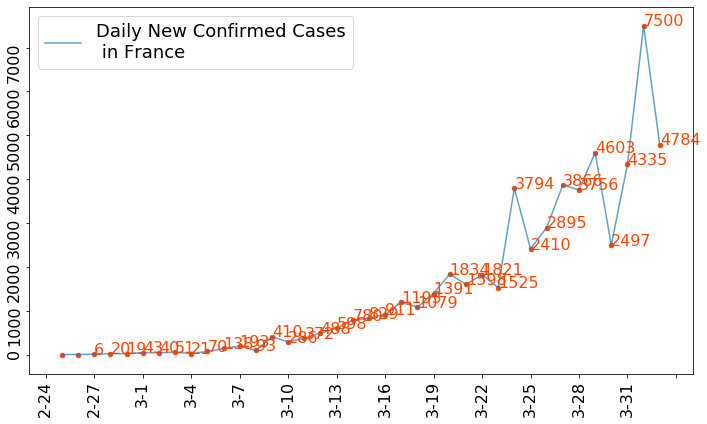

In [164]:
country = 'France'
focus =  df.loc[:,[country]].copy()[35:]
focus['new'] = focus[country] - focus[country].shift(1)
focus

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(10,6))
ax.plot(focus.index, focus.new, label='Daily New Confirmed Cases\n in France', alpha=0.7)
ax.scatter(focus.index, focus.new, c='orangered',s=20, label='')
# ax.plot(focus.index, focus['Republic\n of Korea'],c='orangered')

for i, v in enumerate(focus.new):
    if v > 0:
        ax.text(i, v+0.3, str(int(v)), color='orangered', fontsize=16)

# ax.set_yscale('log')
ax.tick_params(labelrotation=90, labelsize=16)
# ax.set_ylim((0, 1285))

ax.legend(loc="upper left", fontsize=18)

plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
# plt.savefig('figures/France_3_18.png',dpi=600)


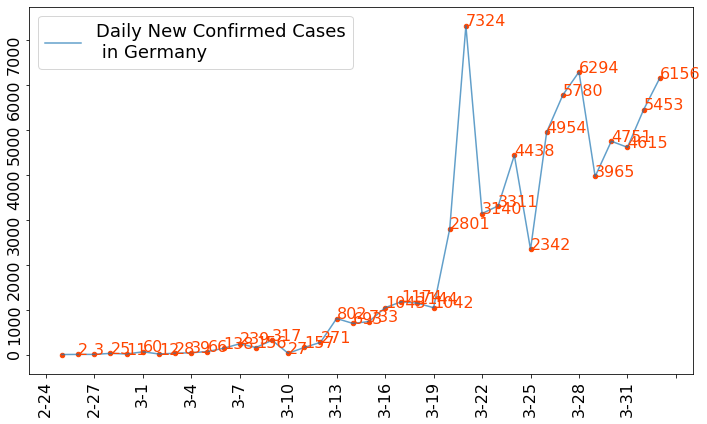

In [165]:
country = 'Germany'
focus =  df.loc[:,[country]].copy()[35:]
focus['new'] = focus[country] - focus[country].shift(1)
focus

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(10,6))
ax.plot(focus.index, focus.new, label='Daily New Confirmed Cases\n in Germany', alpha=0.7)
ax.scatter(focus.index, focus.new, c='orangered',s=20, label='')
# ax.plot(focus.index, focus['Republic\n of Korea'],c='orangered')

for i, v in enumerate(focus.new):
    if v > 0:
        ax.text(i, v+0.3, str(int(v)), color='orangered', fontsize=16)

# ax.set_yscale('log')
ax.tick_params(labelrotation=90, labelsize=16)
# ax.set_ylim((0, 1285))

ax.legend(loc="upper left", fontsize=18)

plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
# plt.savefig('figures/Germany_3_18.png',dpi=600)


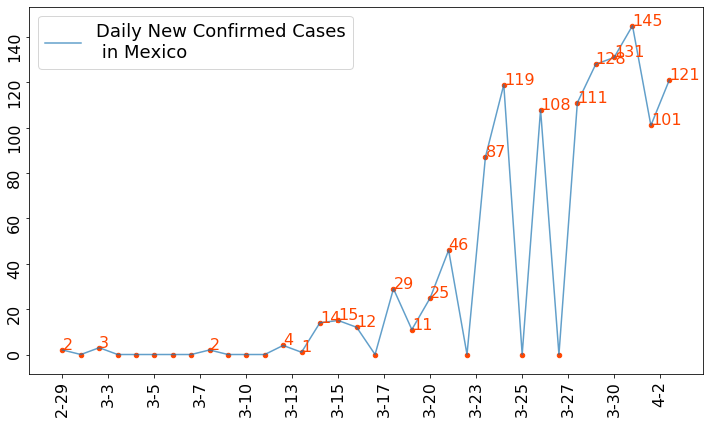

In [184]:
country = 'Mexico'
focus =  df.loc[:,[country]].copy()[35:]
focus['new'] = focus[country] - focus[country].shift(1)
focus

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(10,6))
ax.plot(focus.index, focus.new, label='Daily New Confirmed Cases\n in ' + country, alpha=0.7)
ax.scatter(focus.index, focus.new, c='orangered',s=20, label='')
# ax.plot(focus.index, focus['Republic\n of Korea'],c='orangered')

for i, v in enumerate(focus.new):
    if v > 0 and v not in [482,642,2433,2546]:
        ax.text(i, v+0.3, str(int(v)), color='orangered', fontsize=16)

# ax.set_yscale('log')
ax.tick_params(labelrotation=90, labelsize=16)
# ax.set_ylim((0, 1285))

ax.legend(loc="upper left", fontsize=18)

plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
# plt.savefig('figures/Switzerland_3_18.png',dpi=600)


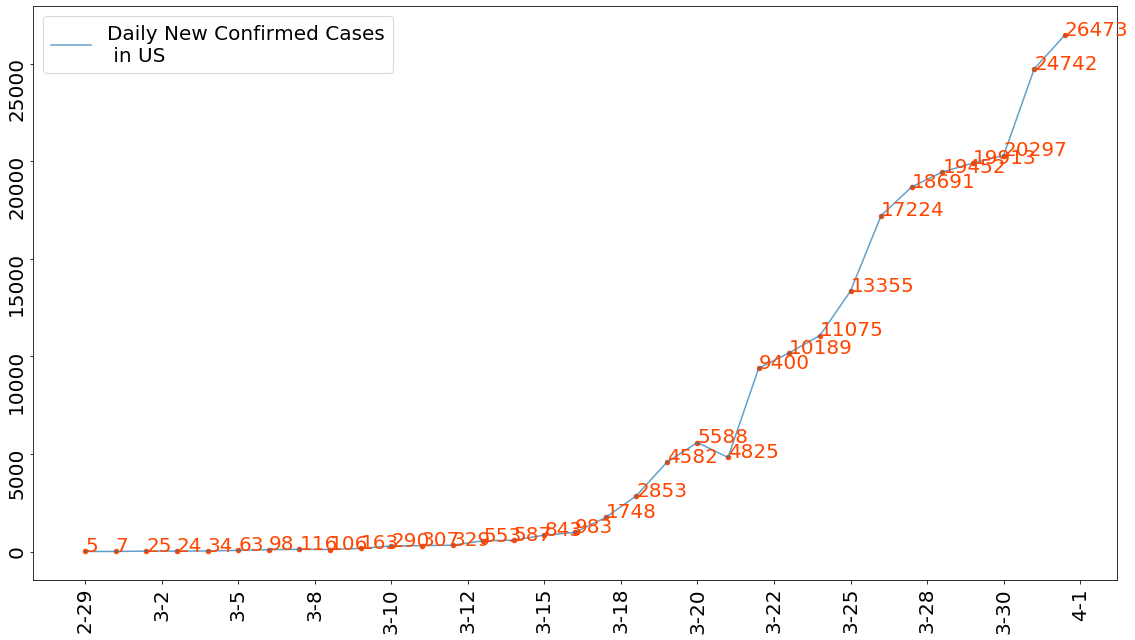

In [167]:
country = 'US'
focus =  df.loc[:,[country]].copy()[35:]
focus['new'] = focus[country] - focus[country].shift(1)
focus = focus.iloc[3:-1,:][2:]

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))
ax.plot(focus.index, focus.new, label='Daily New Confirmed Cases\n in US', alpha=0.7)
ax.scatter(focus.index, focus.new, c='orangered',s=20, label='')
# ax.plot(focus.index, focus['Republic\n of Korea'],c='orangered')

for i, v in enumerate(focus.new):
    if v > 0:
        ax.text(i, v+0.3, str(int(v)), color='orangered', fontsize=20)

# ax.set_yscale('log')
ax.tick_params(labelrotation=90, labelsize=20)
# ax.set_ylim((0, 1285))

ax.legend(loc="upper left", fontsize=20)

plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.savefig('figures/US_4_2.png',dpi=600)


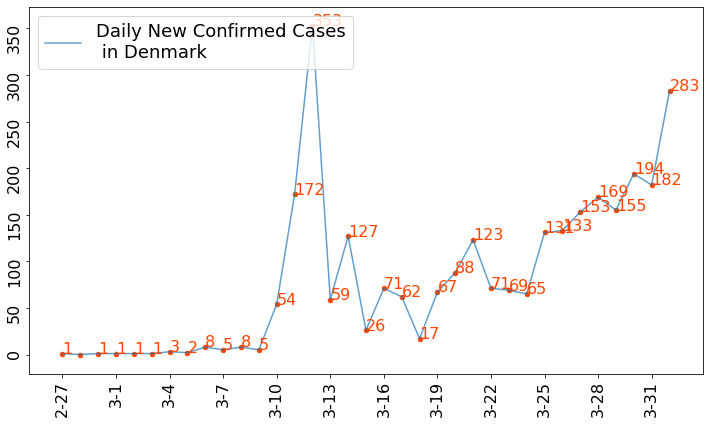

In [168]:
country = 'Denmark'
focus =  df.loc[:,[country]].copy()[35:]
focus['new'] = focus[country] - focus[country].shift(1)
focus = focus.iloc[3:-1,:]

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(10,6))
ax.plot(focus.index, focus.new, label='Daily New Confirmed Cases\n in Denmark', alpha=0.7)
ax.scatter(focus.index, focus.new, c='orangered',s=20, label='')
# ax.plot(focus.index, focus['Republic\n of Korea'],c='orangered')

for i, v in enumerate(focus.new):
    if v > 0:
        ax.text(i, v+0.3, str(int(v)), color='orangered', fontsize=16)

# ax.set_yscale('log')
ax.tick_params(labelrotation=90, labelsize=16)
# ax.set_ylim((0, 1285))

ax.legend(loc="upper left", fontsize=18)

plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
# plt.savefig('figures/Denmark_3_22.png',dpi=600)


# Individual Countries Dynamics

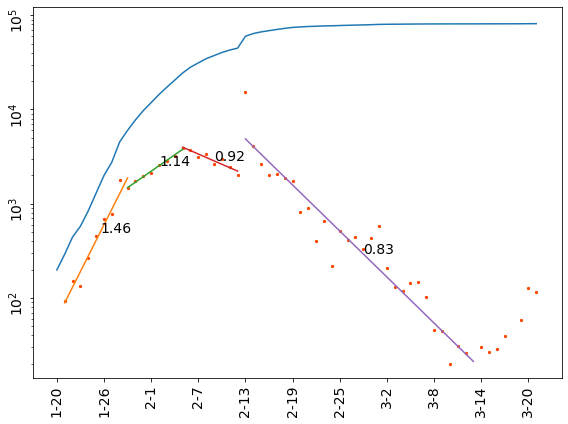

In [163]:
def country_dynamic(province, days):
    fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(8,6))
   
    focus = df[[province]].copy()
    focus['d_'+province] = focus[province] - focus[province].shift(1)

    ax.set_yscale('log')
    ax.plot(focus.index, focus[province], label=province)
    ax.scatter(focus.index, focus[('d_'+province)], c='orangered', s=5)
    # ax.legend(prop={'size': 12})

    for a, b in days:
            slope, intercept, _,_,_ = stats.linregress(np.arange(a,b),np.log(focus[('d_'+province)][a:b].values))
            x = np.arange(a,b)
            y = np.exp(slope*x + intercept)
            ax.plot(x, y)
            ax.annotate(np.round(np.exp(slope),2), xy=((a+b)/2,np.exp(slope*(a+b)/2+intercept)), fontsize=14)

    ax.tick_params(labelrotation=90, labelsize=14)
    ax.xaxis.set_major_locator(plt.MaxNLocator(12))
#     ax.set_xlim(left=25)
    plt.tight_layout()
    
country_dynamic('China', [(1,10),(9,17),(16,24),(24,54)])

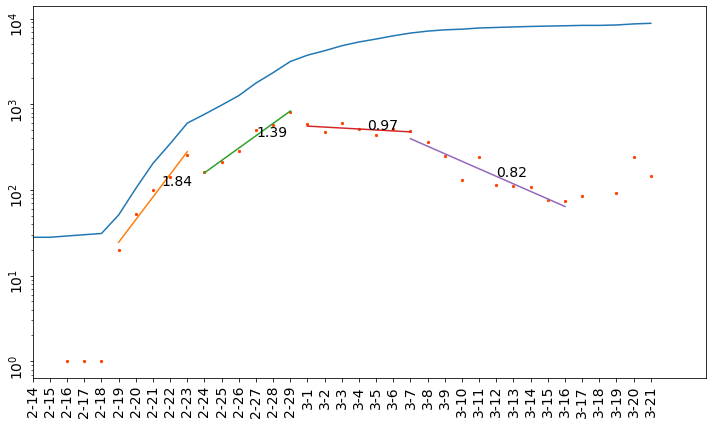

In [164]:
def country_dynamic(province, days):
    fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(10,6))
   
    focus = df[[province]].copy()
    focus['d_'+province] = focus[province] - focus[province].shift(1)

    ax.set_yscale('log')
    ax.plot(focus.index, focus[province], label=province)
    ax.scatter(focus.index, focus[('d_'+province)], c='orangered', s=5)
    # ax.legend(prop={'size': 12})

    for a, b in days:
            slope, intercept, _,_,_ = stats.linregress(np.arange(a,b),np.log(focus[('d_'+province)][a:b].values))
            x = np.arange(a,b)
            y = np.exp(slope*x + intercept)
            ax.plot(x, y)
            ax.annotate(np.round(np.exp(slope),2), xy=((a+b)/2,np.exp(slope*(a+b)/2+intercept)), fontsize=14)

    ax.tick_params(labelrotation=90, labelsize=14)
#     ax.xaxis.set_major_locator(plt.MaxNLocator(20))
    ax.set_xlim(left=25)
    plt.tight_layout()
    
country_dynamic('South Korea', [(30,35),(35,41),(41,48),(47,57)])

# plt.savefig('figures/Daily_misc_3_17.pdf')

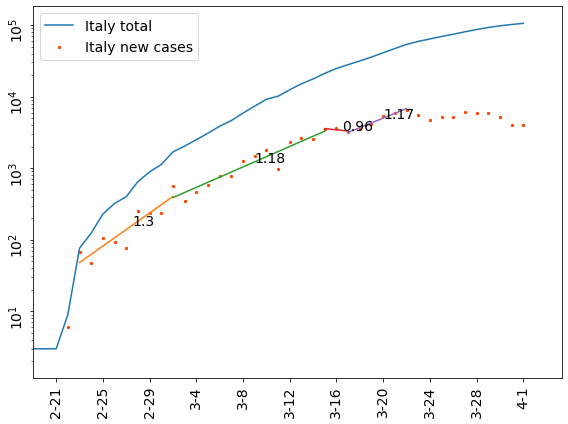

In [142]:
def country_dynamic(province, days):
    fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(8,6))
   
    focus = df[[province]].copy()
    focus['d_'+province] = focus[province] - focus[province].shift(1)

    ax.set_yscale('log')
    ax.plot(focus.index, focus[province], label=province+ ' total')
    ax.scatter(focus.index, focus[('d_'+province)], c='orangered', s=5, label=province+ ' new cases')
    ax.legend(prop={'size': 14})

    for a, b in days:
            slope, intercept, _,_,_ = stats.linregress(np.arange(a,b),np.log(focus[('d_'+province)][a:b].values))
            x = np.arange(a,b)
            y = np.exp(slope*x + intercept)
            ax.plot(x, y)
            ax.annotate(np.round(np.exp(slope),2), xy=((a+b)/2,np.exp(slope*(a+b)/2+intercept)), fontsize=14)

    ax.tick_params(labelrotation=90, labelsize=14)
    ax.xaxis.set_major_locator(plt.MaxNLocator(15))
    ax.set_xlim(left=30)
    plt.tight_layout()
    
country_dynamic('Italy',[(34,43),(42,56),(55,58),(57,63)])

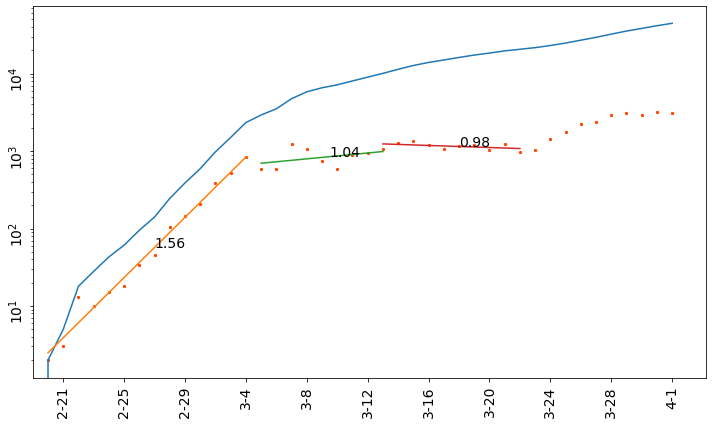

In [143]:
def country_dynamic(province, days):
    fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(10,6))
   
    focus = df[[province]].copy()
    focus['d_'+province] = focus[province] - focus[province].shift(1)

    ax.set_yscale('log')
    ax.plot(focus.index, focus[province], label=province)
    ax.scatter(focus.index, focus[('d_'+province)], c='orangered', s=5)
    # ax.legend(prop={'size': 12})

    for a, b in days:
            slope, intercept, _,_,_ = stats.linregress(np.arange(a,b),np.log(focus[('d_'+province)][a:b].values))
            x = np.arange(a,b)
            y = np.exp(slope*x + intercept)
            ax.plot(x, y)
            ax.annotate(np.round(np.exp(slope),2), xy=((a+b)/2,np.exp(slope*(a+b)/2+intercept)), fontsize=14)

    ax.tick_params(labelrotation=90, labelsize=14)
    ax.xaxis.set_major_locator(plt.MaxNLocator(12))
    ax.set_xlim(left=30)
    plt.tight_layout()

country_dynamic('Iran',[(31,45),(45,54),(53,63)])

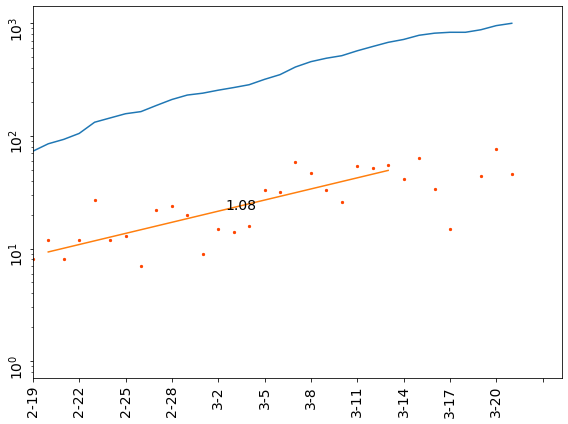

In [172]:
def country_dynamic(province, days):
    fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(8,6))
   
    focus = df[[province]].copy()
    focus['d_'+province] = focus[province] - focus[province].shift(1)

    ax.set_yscale('log')
    ax.plot(focus.index, focus[province], label=province)
    ax.scatter(focus.index, focus[('d_'+province)], c='orangered', s=5)
    # ax.legend(prop={'size': 12})

    for a, b in days:
            slope, intercept, _,_,_ = stats.linregress(np.arange(a,b),np.log(focus[('d_'+province)][a:b].values))
            x = np.arange(a,b)
            y = np.exp(slope*x + intercept)
            ax.plot(x, y)
            ax.annotate(np.round(np.exp(slope),2), xy=((a+b)/2,np.exp(slope*(a+b)/2+intercept)), fontsize=14)

    ax.tick_params(labelrotation=90, labelsize=14)
    ax.xaxis.set_major_locator(plt.MaxNLocator(12))
    ax.set_xlim(left=30)
    plt.tight_layout()

country_dynamic('Japan',[(31,54)])

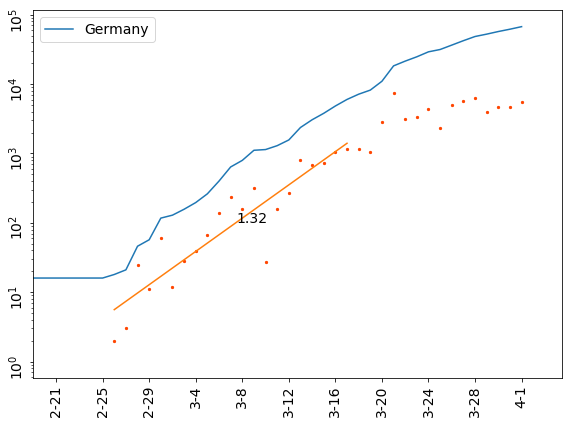

In [144]:
def country_dynamic(province, days):
    fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(8,6))
   
    focus = df[[province]].copy()
    focus['d_'+province] = focus[province] - focus[province].shift(1)

    ax.set_yscale('log')
    ax.plot(focus.index, focus[province], label=province)
    ax.scatter(focus.index, focus[('d_'+province)], c='orangered', s=5)
    ax.legend(prop={'size': 14})

    for a, b in days:
            slope, intercept, _,_,_ = stats.linregress(np.arange(a,b),np.log(focus[('d_'+province)][a:b].values))
            x = np.arange(a,b)
            y = np.exp(slope*x + intercept)
            ax.plot(x, y)
            ax.annotate(np.round(np.exp(slope),2), xy=((a+b)/2,np.exp(slope*(a+b)/2+intercept)), fontsize=14)

    ax.tick_params(labelrotation=90, labelsize=14)
    ax.xaxis.set_major_locator(plt.MaxNLocator(12))
    ax.set_xlim(left=30)
    plt.tight_layout()

country_dynamic('Germany',[(37,58)])

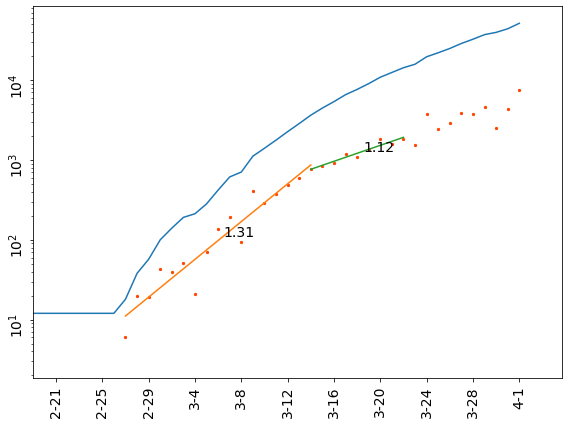

In [145]:
def country_dynamic(province, days):
    fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(8,6))
   
    focus = df[[province]].copy()
    focus['d_'+province] = focus[province] - focus[province].shift(1)

    ax.set_yscale('log')
    ax.plot(focus.index, focus[province], label=province)
    ax.scatter(focus.index, focus[('d_'+province)], c='orangered', s=5)
    # ax.legend(prop={'size': 12})

    for a, b in days:
            slope, intercept, _,_,_ = stats.linregress(np.arange(a,b),np.log(focus[('d_'+province)][a:b].values))
            x = np.arange(a,b)
            y = np.exp(slope*x + intercept)
            ax.plot(x, y)
            ax.annotate(np.round(np.exp(slope),2), xy=((a+b)/2,np.exp(slope*(a+b)/2+intercept)), fontsize=14)

    ax.tick_params(labelrotation=90, labelsize=14)
    ax.xaxis.set_major_locator(plt.MaxNLocator(12))
    ax.set_xlim(left=30)
    plt.tight_layout()

country_dynamic('France',[(38,55),(54,63)])

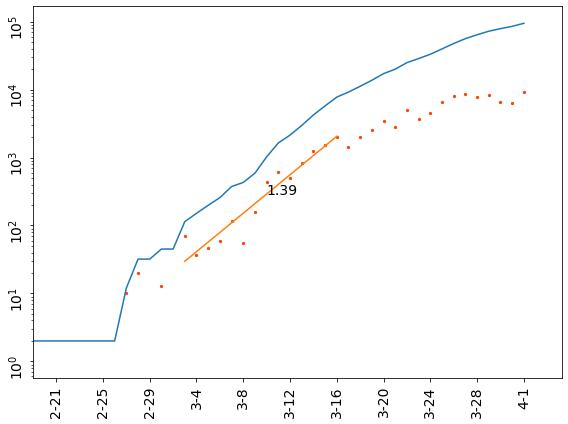

In [146]:
def country_dynamic(province, days):
    fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(8,6))
   
    focus = df[[province]].copy()
    focus['d_'+province] = focus[province] - focus[province].shift(1)

    ax.set_yscale('log')
    ax.plot(focus.index, focus[province], label=province)
    ax.scatter(focus.index, focus[('d_'+province)], c='orangered', s=5)
    # ax.legend(prop={'size': 12})

    for a, b in days:
            slope, intercept, _,_,_ = stats.linregress(np.arange(a,b),np.log(focus[('d_'+province)][a:b].values))
            x = np.arange(a,b)
            y = np.exp(slope*x + intercept)
            ax.plot(x, y)
            ax.annotate(np.round(np.exp(slope),2), xy=((a+b)/2,np.exp(slope*(a+b)/2+intercept)), fontsize=14)

    ax.tick_params(labelrotation=90, labelsize=14)
    ax.xaxis.set_major_locator(plt.MaxNLocator(12))
    ax.set_xlim(left=30)
    plt.tight_layout()

country_dynamic('Spain',[(43,57)])

In [148]:
df = df.iloc[:-1,:]

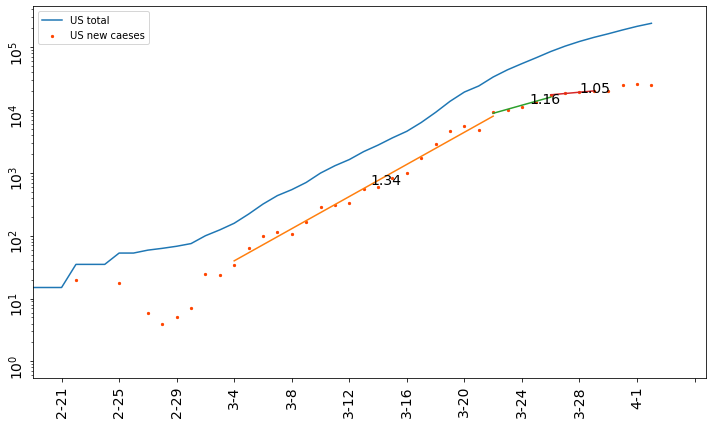

In [169]:
def country_dynamic(province, days):
    fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(10,6))
   
    focus = df[[province]].copy()
    focus['d_'+province] = focus[province] - focus[province].shift(1)

    ax.set_yscale('log')
    ax.plot(focus.index, focus[province], label=province + ' total')
    ax.scatter(focus.index, focus[('d_'+province)], c='orangered', s=5, label=province + ' new caeses')
    # ax.legend(prop={'size': 12})

    for a, b in days:
            slope, intercept, _,_,_ = stats.linregress(np.arange(a,b),np.log(focus[('d_'+province)][a:b].values))
            x = np.arange(a,b)
            y = np.exp(slope*x + intercept)
            ax.plot(x, y)
            ax.annotate(np.round(np.exp(slope),2), xy=((a+b)/2,np.exp(slope*(a+b)/2+intercept)), fontsize=14)

    ax.tick_params(labelrotation=90, labelsize=14)
    ax.xaxis.set_major_locator(plt.MaxNLocator(12))
    ax.set_xlim(left=30)
    ax.legend()
    plt.tight_layout()
    

country_dynamic('US',[(44,63),(62,67),(66,70)])
# country_dynamic('US',[(43,47),(47,65)])
# plt.savefig('figures/Daily_misc_3_30.png')

---

In [464]:
 pd.read_csv('data/2019-nCov stats - China CDC.csv').set_index('time').dropna(how='all')

,new confirmed,new confirmed including CD,current confirmed,current confirmed including CD,cum confirmed include clinical,new clinically diagnosed,Hubei clinically diagnosed,new suspected,current suspected,new serious,current serious,new death including CD,new death from CD,cum death including from clinical,new recovered,cum recovered,current on medical observation,today released,cum on medical observation,Unnamed: 20
time,,,,,,,,,,,,,,,,,,,,
1/10/2020,NaN,NaN,NaN,NaN,41,NaN,NaN,NaN,NaN,NaN,7.0,0,NaN,1,NaN,2.0,NaN,NaN,739.0,NaN
1/11/2020,NaN,NaN,NaN,NaN,41,NaN,NaN,NaN,NaN,NaN,7.0,0,NaN,1,NaN,6.0,717.0,NaN,763.0,NaN
1/12/2020,NaN,NaN,NaN,NaN,41,NaN,NaN,NaN,NaN,NaN,6.0,0,NaN,1,NaN,7.0,687.0,NaN,763.0,NaN
1/13/2020,NaN,NaN,NaN,NaN,41,NaN,NaN,NaN,NaN,NaN,6.0,0,NaN,1,NaN,7.0,576.0,NaN,763.0,NaN
1/14/2020,NaN,NaN,NaN,NaN,41,NaN,NaN,NaN,NaN,NaN,6.0,0,NaN,1,NaN,7.0,313.0,NaN,763.0,NaN
1/15/2020,NaN,NaN,NaN,NaN,41,NaN,NaN,NaN,NaN,NaN,5.0,1,NaN,2,NaN,12.0,119.0,NaN,763.0,NaN
1/16/2020,4.0,NaN,NaN,NaN,45,NaN,NaN,NaN,NaN,NaN,5.0,0,NaN,2,NaN,15.0,98.0,NaN,763.0,NaN
1/17/2020,17.0,NaN,NaN,NaN,62,NaN,NaN,NaN,NaN,3.0,8.0,0,NaN,2,4.0,19.0,82.0,NaN,763.0,NaN
1/18/2020,59.0,NaN,NaN,NaN,121,NaN,NaN,NaN,NaN,NaN,9.0,1,NaN,3,5.0,24.0,NaN,NaN,NaN,NaN


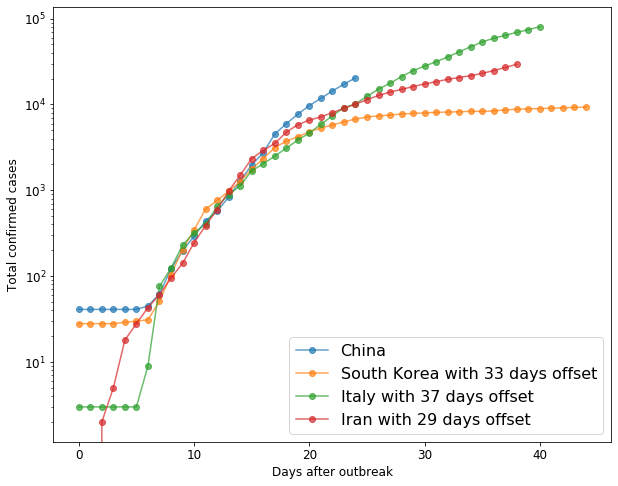

In [117]:
focus = df.copy()
korea = focus['South Korea']
italy = focus['Italy']
iran = focus['Iran']
china = pd.read_csv('data/2019-nCov stats - China CDC.csv').set_index('time').dropna(how='all').iloc[:,4]
us = focus['US']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
ax.set_yscale('log')
ax.plot(china.reset_index(drop=True)[:25], '-o', alpha=0.7, label='China')
ax.plot(korea.shift(-23).reset_index(drop=True), '-o', alpha=0.7, label='South Korea with 33 days offset')
ax.plot(italy.shift(-27).reset_index(drop=True),'-o', alpha=0.7, label='Italy with 37 days offset')
# ax.plot(us.shift(-35).reset_index(drop=True),'-o', alpha=0.7, label='Italy with 37 days offset')
# ax.scatter(np.arange(12),italy.shift(-27).reset_index(drop=True).dropna(), , alpha=0.9 )
ax.plot(iran.shift(-29).reset_index(drop=True),'-o', alpha=0.7, label='Iran with 29 days offset')
ax.legend(fontsize=16)
ax.set_xlabel('Days after outbreak', fontsize=12)
ax.set_ylabel('Total confirmed cases', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)

In [ ]:
focus = df.copy()
korea = focus['South Korea']
italy = focus['Italy']
iran = focus['Iran']
china = pd.read_csv('data/2019-nCov stats - China CDC.csv').set_index('time').dropna(how='all').iloc[:,4]
us = focus['US']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
ax.set_yscale('log')
ax.plot(china.reset_index(drop=True)[:25], '-o', alpha=0.7, label='China')
ax.plot(korea.shift(-23).reset_index(drop=True), '-o', alpha=0.7, label='South Korea with 33 days offset')
ax.plot(italy.shift(-27).reset_index(drop=True),'-o', alpha=0.7, label='Italy with 37 days offset')
# ax.plot(us.shift(-35).reset_index(drop=True),'-o', alpha=0.7, label='Italy with 37 days offset')
# ax.scatter(np.arange(12),italy.shift(-27).reset_index(drop=True).dropna(), , alpha=0.9 )
ax.plot(iran.shift(-29).reset_index(drop=True),'-o', alpha=0.7, label='Iran with 29 days offset')
ax.legend(fontsize=16)
ax.set_xlabel('Days after outbreak', fontsize=12)
ax.set_ylabel('Total confirmed cases', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)

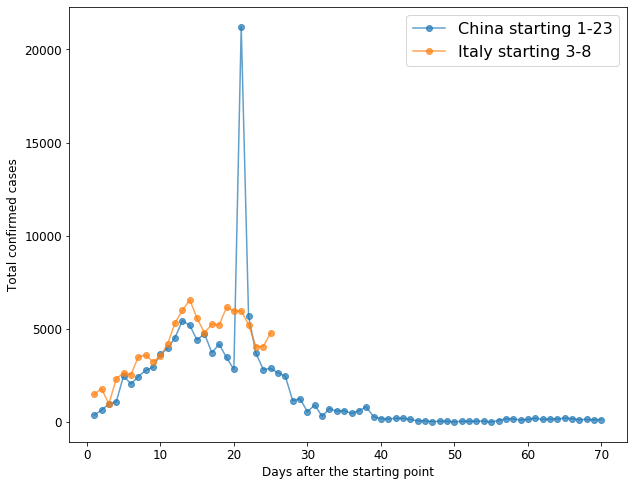

In [231]:
focus = df.copy()
# korea = focus['South Korea']
italy = focus['Italy'][48:]
italy  = italy - italy.shift(1)
# iran = focus['Iran']
# china = pd.read_csv('data/2019-nCov stats - China CDC.csv').set_index('time').dropna(how='all').iloc[:,4]
china = focus['China'][3:]
china = china - china.shift(1)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
# ax.set_yscale('log')
ax.plot(1.4*china.reset_index(drop=True), '-o', alpha=0.7, label='China starting ' + china.index[0])
# ax.plot(korea.shift(-23).reset_index(drop=True), '-o', alpha=0.7, label='South Korea with 33 days offset')
ax.plot(italy.reset_index(drop=True),'-o', alpha=0.7, label='Italy starting ' + italy.index[0])
# ax.scatter(np.arange(12),italy.shift(-27).reset_index(drop=True).dropna(), , alpha=0.9 )
# ax.plot(iran.shift(-30).reset_index(drop=True), label='Iran with 30 days offset')
ax.legend(fontsize=16)
ax.set_xlabel('Days after the starting point', fontsize=12)
ax.set_ylabel('Total confirmed cases', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=12)

In [91]:
focus = df.copy().fillna(0)
for i in list(focus):
    focus[i] = focus[i].astype(int)
    focus['d_'+i] = focus[i] - focus[i].shift(1)
    focus['dp_'+i] = focus['d_'+i] / focus[i]
focus = focus.iloc[:,[i.startswith('dp') for i in list(focus)]]
focus

,dp_Japan,dp_South Korea,dp_Vietnam,dp_Singapore,dp_Australia,dp_Malaysia,dp_Cambodia,dp_Philippines,dp_Thailand,dp_ Nepal,...,dp_Egypt,dp_Iran,dp_Lebanon,dp_Kuwait,dp_Bahrain,dp_Oman,dp_Afghanistan,dp_Iraq,dp_Pakistan,dp_Algeria
time,,,,,,,,,,,,,,,,,,,,,
2020/1/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020/1/21,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020/1/22,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020/1/23,0.000000,0.500000,1.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020/1/24,0.666667,0.000000,0.000000,0.666667,1.000000,NaN,NaN,NaN,0.000000,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020/1/25,0.000000,0.000000,0.000000,0.250000,0.250000,1.000000,NaN,NaN,0.200000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020/1/26,0.250000,0.500000,0.000000,0.000000,0.000000,0.250000,NaN,NaN,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020/1/27,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020/1/28,0.333333,0.000000,0.000000,0.428571,0.200000,0.000000,1.0,NaN,0.642857,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [205]:
focus = pd.read_csv('data/2019-nCov stats - worldometers.csv').set_index('Unnamed: 0')\
    .T[['Italy','Iran','Spain','France','Germany','USA']]\
    .iloc[5:,:]

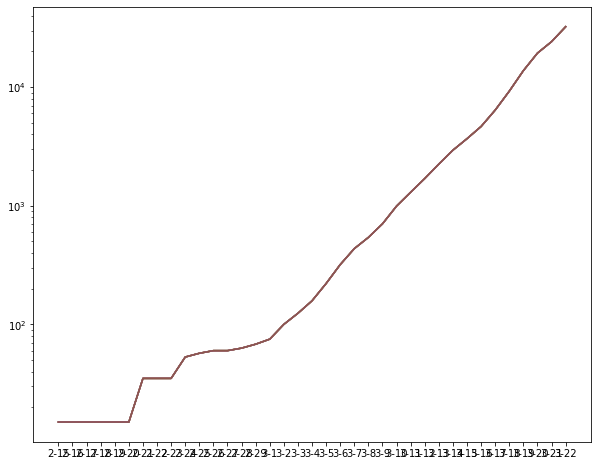

In [206]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,8))
ax.set_yscale('log')

for i in list(focus):
    ax.plot(focus['USA'])

In [124]:
t = pd.read_clipboard(header=None).set_index(0)
t.head()

,1,2,3,4
0,,,,
Iceland,19516.0,1220.0,53577.0,63.0
United Arab Emirates,220000.0,570.0,22918.0,2.6
Italy: Veneto,106238.0,9155.0,21655.0,86.0
Bahrain,33852.0,268.0,21569.0,8.8
Canada: NT,833.0,1.0,18551.0,1.2


In [119]:
for i in t.index:
    if ':' in i:
        t = t.drop(i)
        

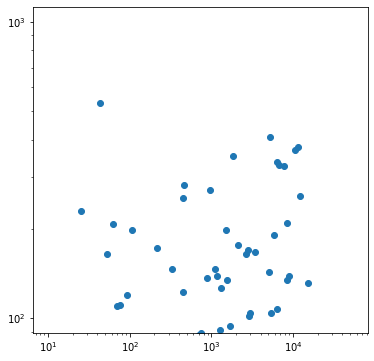

In [125]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
ax.scatter(t[3],t[4])
ax.set_xscale('log')
ax.set_yscale('log')